<font size = 5>
Operation Duration Visualization

In [5]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/yangzhiyuan/Desktop/Data_Think/BBB/Data/Main_BusinessDataBBB_02022024.csv')

# Clean the 'Established' column
df['Established'] = pd.to_datetime(df['Established'], errors='coerce')

# Filter out rows where 'AB' column is True
accredited_df = df[df['AB?'] == True]

# Calculate years in business
accredited_df['Years_in_business'] = (datetime.now() - accredited_df['Established']).dt.days / 365.25

# Calculate average years in business for accredited businesses
average_years_in_business = accredited_df['Years_in_business'].mean()

print("Average years in business for accredited businesses:", average_years_in_business)


Average years in business for accredited businesses: 16.348506405643636


/var/folders/4t/xgsphxbn791_llp8nx06j7j40000gn/T/ipykernel_60086/786528522.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accredited_df['Years_in_business'] = (datetime.now() - accredited_df['Established']).dt.days / 365.25


In [7]:
# Filter out rows where 'AB' column is False and 'Rating' column is A, A-, A+, or B
filtered_df = df[(df['AB?'] == False) & (df['Rating'].isin(['A', 'A-', 'A+', 'B']))]

# Calculate years in business
filtered_df['Years_in_business'] = (datetime.now() - filtered_df['Established']).dt.days / 365.25

# Calculate average years in business for the filtered subset
average_years_in_business_false = filtered_df['Years_in_business'].mean()

print("Average years in business for AB = False and Rating = A, A-, A+, or B:", average_years_in_business_false)


Average years in business for AB = False and Rating = A, A-, A+, or B: 19.279452940830087


/var/folders/4t/xgsphxbn791_llp8nx06j7j40000gn/T/ipykernel_60086/4059422651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Years_in_business'] = (datetime.now() - filtered_df['Established']).dt.days / 365.25


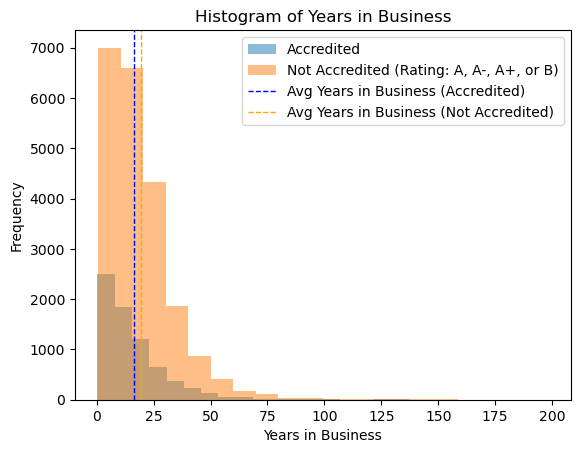

In [11]:
# Plotting the histogram
plt.hist(accredited_df['Years_in_business'], bins=20, alpha=0.5, label='Accredited')
plt.hist(filtered_df['Years_in_business'], bins=20, alpha=0.5, label='Not Accredited (Rating: A, A-, A+, or B)')
plt.axvline(average_years_in_business, color='blue', linestyle='dashed', linewidth=1, label='Avg Years in Business (Accredited)')
plt.axvline(average_years_in_business_false, color='orange', linestyle='dashed', linewidth=1, label='Avg Years in Business (Not Accredited)')
plt.xlabel('Years in Business')
plt.ylabel('Frequency')
plt.title('Histogram of Years in Business')
plt.legend()
plt.show()

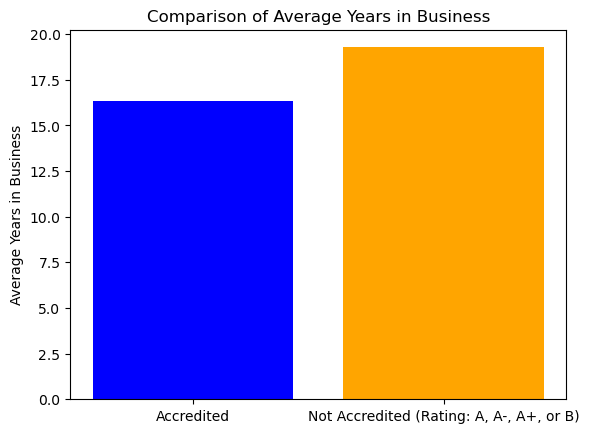

In [12]:
plt.bar(['Accredited', 'Not Accredited (Rating: A, A-, A+, or B)'], [average_years_in_business, average_years_in_business_false], color=['blue', 'orange'])
plt.ylabel('Average Years in Business')
plt.title('Comparison of Average Years in Business')
plt.show()

<font size = 3>
I wanted to compare duration of operation between accredited businesses and not accredited businesses. Surprisingly, the average duration of operation is longer for not accredited business. I think this may due to that 1. The not accredited business did not update their profile, they may have shut down already. 2. Duration of operation is not an important factor for accreditation standards. So I moved on to another data visualization. 

<font size = 5>
Demographics Visualization

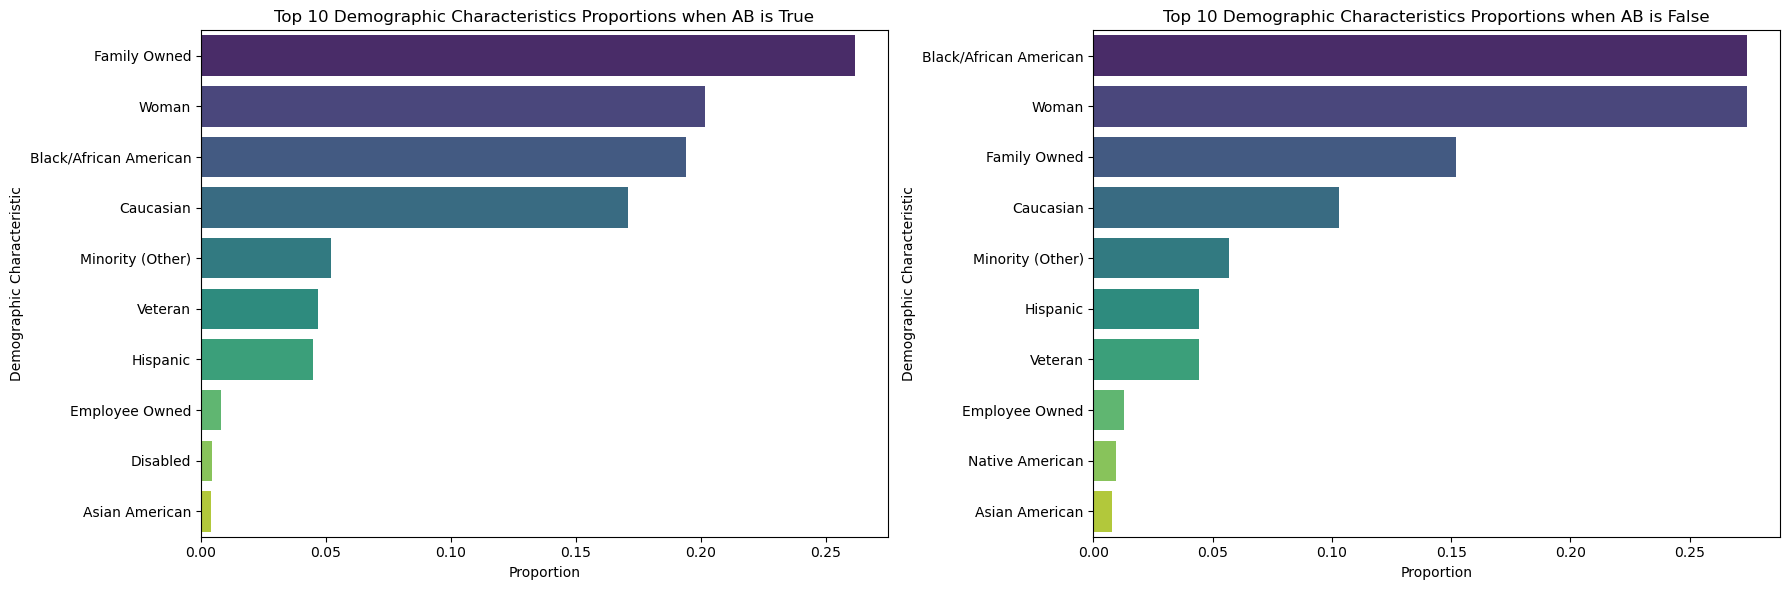

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
demographic_address = pd.read_csv('/Users/yangzhiyuan/Desktop/Data_Think/demographic_address.csv')

# Filter cases where AB is True
ab_true_df = demographic_address[demographic_address['AB?'] == True]

# Count occurrences of each demographic
demographic_counts = ab_true_df['Demographic'].str.split(', ').explode().value_counts()

# Calculate proportions
total_occurrences = demographic_counts.sum()
demographic_proportions = demographic_counts / total_occurrences

# Get the top 10 demographics
top_10_demographics_true = demographic_proportions.head(10)

# Filter cases where AB is False
ab_false_df = demographic_address[demographic_address['AB?'] == False]

# Count occurrences of each demographic
demographic_counts = ab_false_df['Demographic'].str.split(', ').explode().value_counts()

# Calculate proportions
total_occurrences = demographic_counts.sum()
demographic_proportions = demographic_counts / total_occurrences

# Get the top 10 demographics
top_10_demographics_false = demographic_proportions.head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for AB = True
sns.barplot(x=top_10_demographics_true.values, y=top_10_demographics_true.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Demographic Characteristics Proportions when AB is True')
axes[0].set_xlabel('Proportion')
axes[0].set_ylabel('Demographic Characteristic')    

# Plot for AB = False
sns.barplot(x=top_10_demographics_false.values, y=top_10_demographics_false.index, ax=axes[1], palette='viridis')
axes[1].set_title('Top 10 Demographic Characteristics Proportions when AB is False')
axes[1].set_xlabel('Proportion')
axes[1].set_ylabel('Demographic Characteristic')    

plt.tight_layout()
plt.show()


<font size = 3>
 "family owned," "woman owned," and "black owned" are the top demographic features for both accredited and non-accredited businesses, albeit in slightly different orders. Can help find potential trend maybe? But not very helpful overall.

<font size = 5>
Location Visualizations

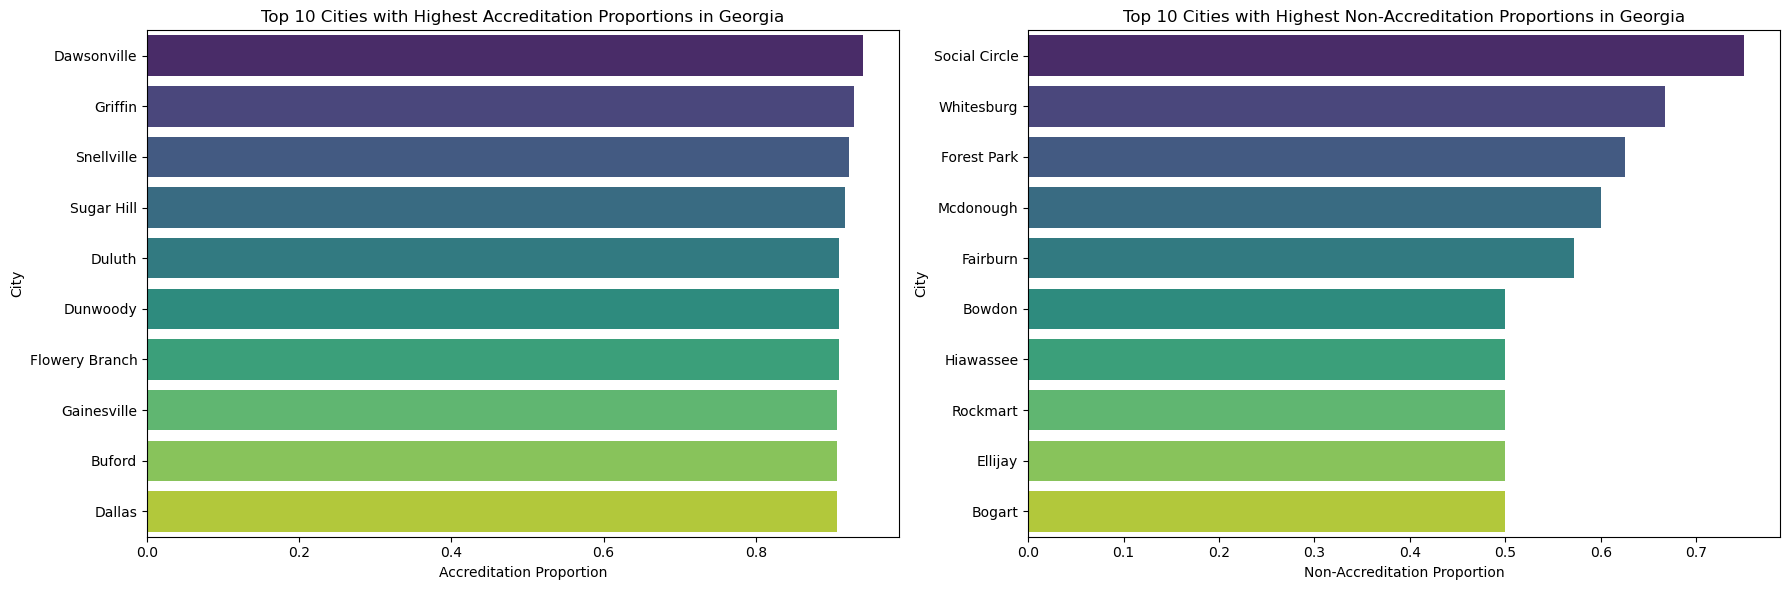

In [4]:
# Filter data for the state of Georgia
demographic_address_ga = demographic_address[demographic_address['State_x'] == 'GA']

# Group by city and count businesses in Georgia
city_counts_ga = demographic_address_ga['City'].value_counts()

# Group by city and count businesses with AB True in Georgia
city_counts_ab_true_ga = demographic_address_ga[demographic_address_ga['AB?'] == True]['City'].value_counts()

# Reindex to align indices for comparison
city_counts_ab_true_ga = city_counts_ab_true_ga.reindex(city_counts_ga.index, fill_value=0)

# Calculate accreditation proportions for each city in Georgia
city_proportions_ab_true_ga = city_counts_ab_true_ga / city_counts_ga

# Filter out cities with only one business and those where all businesses have "AB" as true
valid_cities_ab_true_ga = city_proportions_ab_true_ga[(city_counts_ga > 1) & (city_counts_ab_true_ga != city_counts_ga)]

# Get the top 10 cities with the highest accreditation proportions in Georgia
top_10_cities_ab_true_ga = valid_cities_ab_true_ga.nlargest(10)

# Filter data for the state of Georgia
demographic_address_ga = demographic_address[demographic_address['State_x'] == 'GA']

# Group by city and count businesses in Georgia
city_counts_ga = demographic_address_ga['City'].value_counts()

# Group by city and count businesses with AB True in Georgia
city_counts_ab_false_ga = demographic_address_ga[demographic_address_ga['AB?'] == False]['City'].value_counts()

# Reindex to align indices for comparison
city_counts_ab_false_ga = city_counts_ab_false_ga.reindex(city_counts_ga.index, fill_value=0)

# Calculate accreditation proportions for each city in Georgia
city_proportions_ab_false_ga = city_counts_ab_false_ga / city_counts_ga

# Filter out cities with only one business and those where all businesses have "AB" as true
valid_cities_ab_false_ga = city_proportions_ab_false_ga[(city_counts_ga > 1) & (city_counts_ab_false_ga != city_counts_ga)]

# Get the top 10 cities with the highest accreditation proportions in Georgia
top_10_cities_ab_false_ga = valid_cities_ab_false_ga.nlargest(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for AB True
sns.barplot(x=top_10_cities_ab_true_ga.values, y=top_10_cities_ab_true_ga.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Cities with Highest Accreditation Proportions in Georgia')
axes[0].set_xlabel('Accreditation Proportion')
axes[0].set_ylabel('City')

# Plot for AB False
sns.barplot(x=top_10_cities_ab_false_ga.values, y=top_10_cities_ab_false_ga.index, ax=axes[1], palette='viridis')
axes[1].set_title('Top 10 Cities with Highest Non-Accreditation Proportions in Georgia')
axes[1].set_xlabel('Non-Accreditation Proportion')
axes[1].set_ylabel('City')

plt.tight_layout()
plt.show()


<font size = 3>
The cities are different for AB=True and AB = False. So maybe we can use city as a feature in the model.

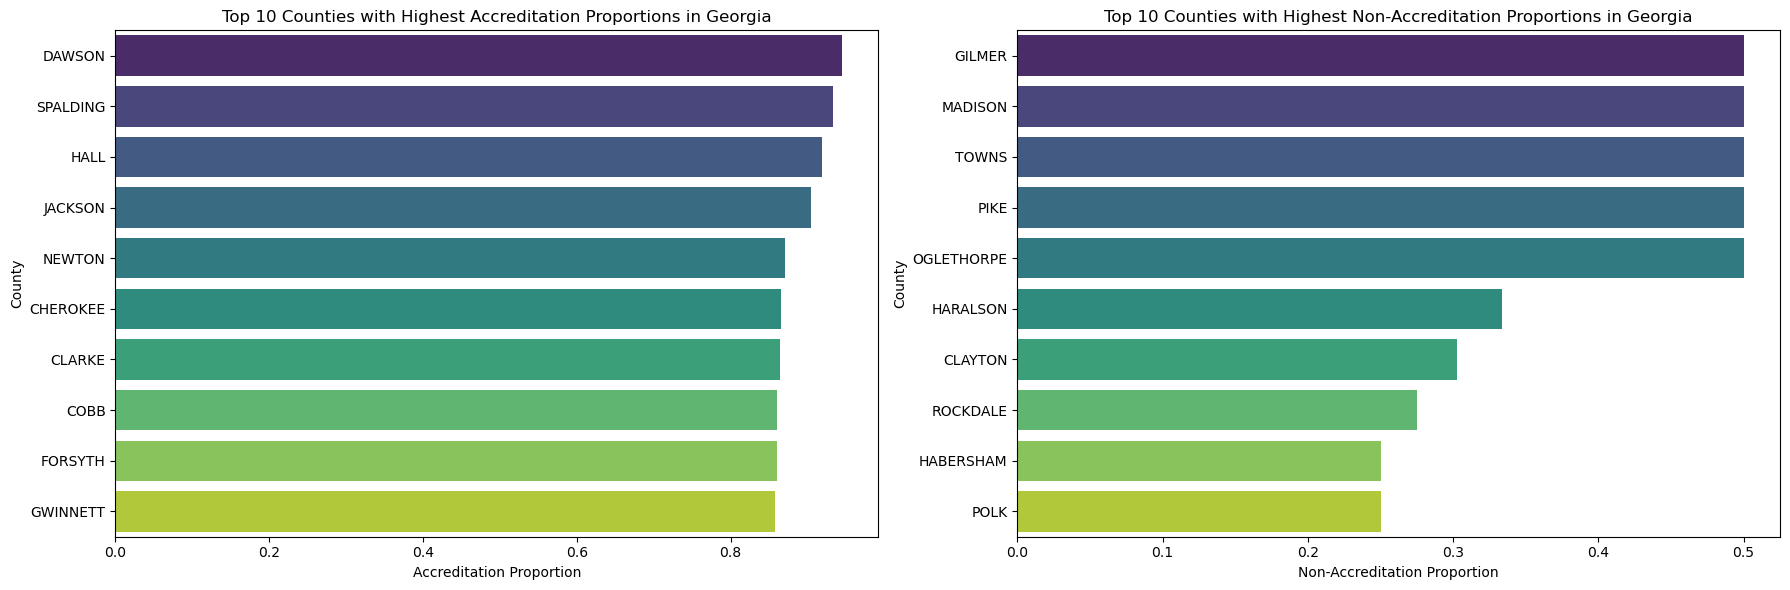

In [5]:
# Group by county and count businesses in Georgia
county_counts_ga = demographic_address_ga['County'].value_counts()

# Group by county and count businesses with AB True in Georgia
county_counts_ab_true_ga = demographic_address_ga[demographic_address_ga['AB?'] == True]['County'].value_counts()

# Reindex to align indices for comparison
county_counts_ab_true_ga = county_counts_ab_true_ga.reindex(county_counts_ga.index, fill_value=0)

# Calculate accreditation proportions for each county in Georgia
county_proportions_ab_true_ga = county_counts_ab_true_ga / county_counts_ga

# Filter out counties with only one business and those where all businesses have "AB" as true
valid_counties_ab_true_ga = county_proportions_ab_true_ga[(county_counts_ga > 1) & (county_counts_ab_true_ga != county_counts_ga)]

# Get the top 10 counties with the highest accreditation proportions in Georgia
top_10_counties_ab_true_ga = valid_counties_ab_true_ga.nlargest(10)

# Group by county and count businesses with AB False in Georgia
county_counts_ab_false_ga = demographic_address_ga[demographic_address_ga['AB?'] == False]['County'].value_counts()

# Reindex to align indices for comparison
county_counts_ab_false_ga = county_counts_ab_false_ga.reindex(county_counts_ga.index, fill_value=0)

# Calculate accreditation proportions for each county in Georgia
county_proportions_ab_false_ga = county_counts_ab_false_ga / county_counts_ga

# Filter out counties with only one business and those where all businesses have "AB" as true
valid_counties_ab_false_ga = county_proportions_ab_false_ga[(county_counts_ga > 1) & (county_counts_ab_false_ga != county_counts_ga)]

# Get the top 10 counties with the highest accreditation proportions in Georgia
top_10_counties_ab_false_ga = valid_counties_ab_false_ga.nlargest(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for AB True
sns.barplot(x=top_10_counties_ab_true_ga.values, y=top_10_counties_ab_true_ga.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Counties with Highest Accreditation Proportions in Georgia')
axes[0].set_xlabel('Accreditation Proportion')
axes[0].set_ylabel('County')

# Plot for AB False
sns.barplot(x=top_10_counties_ab_false_ga.values, y=top_10_counties_ab_false_ga.index, ax=axes[1], palette='viridis')
axes[1].set_title('Top 10 Counties with Highest Non-Accreditation Proportions in Georgia')
axes[1].set_xlabel('Non-Accreditation Proportion')
axes[1].set_ylabel('County')

plt.tight_layout()
plt.show()

<font size = 5>
"Location Transparency" as a feature

<font size = 3>
Another factor I noticed in the BBB accreditation standard is “transparency”. For transparency in location, many addresses of the business are not correct, like “-144”, “333” etc. But these businesses still have high ratings. I think we can say “whether this address is accessible” as a feature of accreditation. Because if the address is not correct, that probably means that this business is 1. An online business that does not have real address or 2. The business does not want to cooperate with BBB so they just don’t write the profile and information correctly. 


<font size = 5>
Proportion of rating for accredited business

In [9]:
# Filter data for AB = True
df = pd.read_csv('/Users/yangzhiyuan/Desktop/Data_Think/BBB/Data/Main_BusinessDataBBB_02022024.csv')
# Filter data for AB = True
ab_true_data = df[df['AB?'] == True]

# Count total number of businesses with AB = True
total_ab_true = len(ab_true_data)

# Count occurrences of each rating
rating_counts = ab_true_data['Rating'].value_counts()

# Calculate proportion of each rating
rating_proportions = rating_counts / total_ab_true

print("Proportion of each rating for AB = True:")
print(rating_proportions)

Proportion of each rating for AB = True:
A+    0.827434
A     0.070520
NR    0.051438
A-    0.046045
B     0.002904
B+    0.001659
Name: Rating, dtype: float64


<font size = 5>
Proportion of rating for non-accredited business

In [11]:
# Filter data for AB = False and ratings B, B+, A-, A, A+
ab_false_data = df[(df['AB?'] == False) & (df['Rating'].isin(['B', 'B+', 'A-', 'A', 'A+']))]

# Count total number of businesses with AB = False and specified ratings
total_ab_false = len(ab_false_data)

# Count occurrences of each rating
rating_counts = ab_false_data['Rating'].value_counts()

# Calculate proportion of each rating
rating_proportions = rating_counts / total_ab_false

print("Proportion of each specified rating for AB = False:")
print(rating_proportions)



Proportion of each specified rating for AB = False:
A+    0.934052
A     0.036294
A-    0.024765
B+    0.003729
B     0.001160
Name: Rating, dtype: float64


<font size = 3>
For both accredited business and non-accredited business, A+ has the highest proportion. The proportion of A+ in non-accredited businesses is actually very high (93%). 

As we talked last time, the criteria for rating and accreditation is almost the same. So, why are the highly rated businesses not accredited? I have come up with some possible reasons. 
1. Even though they are A+, they are still not good enough. A+ is the highest possible rating, but it doesn't mean that all the A+ are equally good. Maybe the accredited A+ businesses are better than the non-accredited businesses who received A+. But it's difficult to identity which specific part that makes the non-accredited A+ business inferior to the accredited A+ business.
2. Some A+ businesses do not want to apply for BBB accreditation. I think this is the main reason. These businesses just don't want to apply for accreditation for whatever reasons, so even though they are potentially good businesses, they are not accredited. 

Since we want to find businesses who are more likely to be accredited, we should prioritize those who want to be accredited. One way of identifying which businesses want to be accredited is to see whether they have a complete profile on BBB or not. To be more specific, if they filled their address, telephone correctly, it means that they trust the BBB platform, or at least they value BBB. So maybe we can use "complete profile" as a feature.